In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv('drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [5]:
df.shape

(200, 6)

### EDA

In [6]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


Text(0.5, 1.0, '% Hombres y Mujeres')

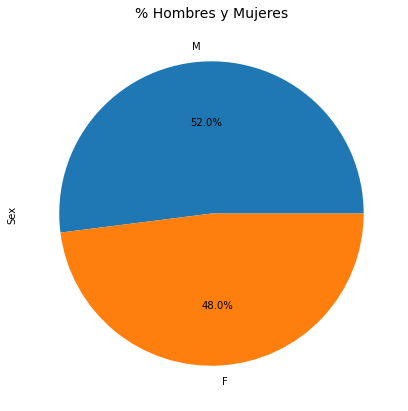

In [7]:
plt.figure(figsize=(7,7))
df['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('% Hombres y Mujeres', fontsize=14)

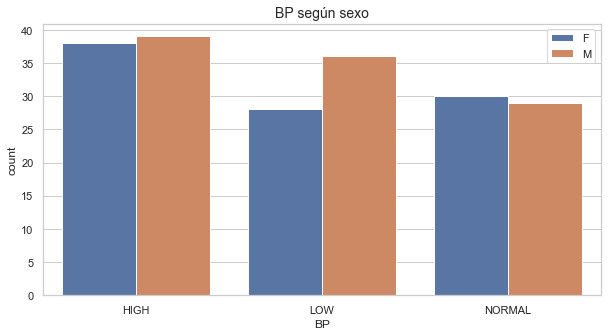

In [8]:
sns.set_theme(style="whitegrid")
fig, ax=plt.subplots(figsize=(10, 5))
sns.countplot(x='BP', data=df, ax=ax, hue='Sex')
plt.title('BP según sexo', fontsize=14)
plt.legend(loc='upper right')
plt.show()

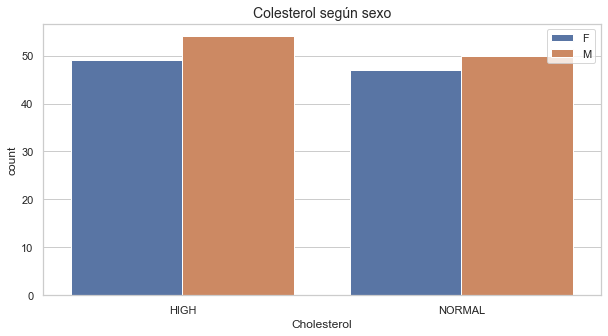

In [9]:
sns.set_theme(style="whitegrid")
fig, ax=plt.subplots(figsize=(10, 5))
sns.countplot(x='Cholesterol', data=df, ax=ax, hue='Sex')
plt.title('Colesterol según sexo', fontsize=14)
plt.legend(loc='upper right')
plt.show()

<AxesSubplot:title={'center':'Drogas prescriptas'}, xlabel='Drug', ylabel='count'>

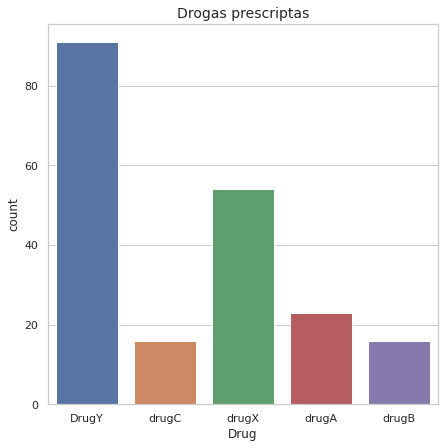

In [9]:
sns.set(style="whitegrid")
plt.figure(figsize=(7,7))
plt.title('Drogas prescriptas', fontsize=14)
sns.countplot(data=df, x="Drug")

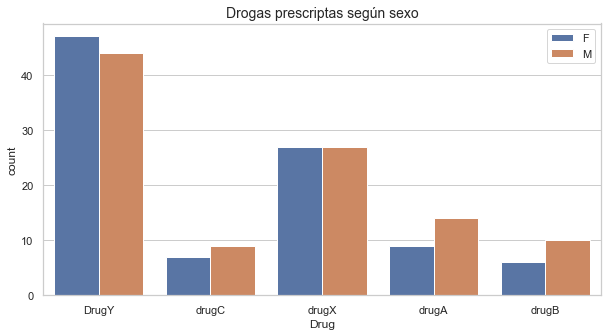

In [10]:
sns.set_theme(style="whitegrid")
fig, ax=plt.subplots(figsize=(10, 5))
sns.countplot(x='Drug', data=df, ax=ax, hue='Sex')
plt.title('Drogas prescriptas según sexo', fontsize=14)
plt.legend(loc='upper right')
plt.show()

<AxesSubplot:xlabel='Drug', ylabel='Na_to_K'>

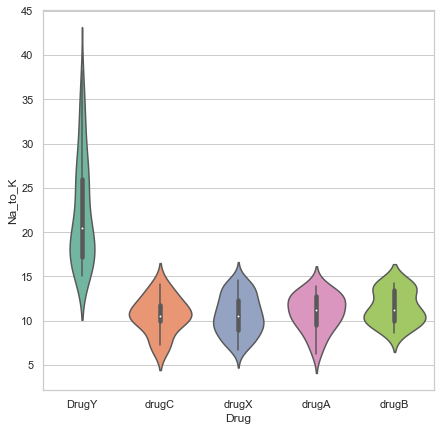

In [11]:
sns.set(style="whitegrid")
plt.figure(figsize=(7,7))
sns.violinplot(x="Drug", y="Na_to_K", data=df, palette='Set2')

<AxesSubplot:xlabel='Drug', ylabel='Age'>

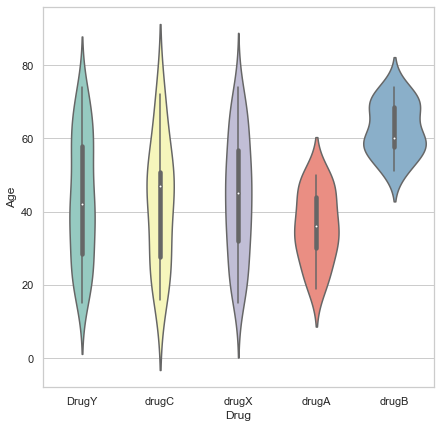

In [12]:
sns.set(style="whitegrid")
plt.figure(figsize=(7,7))
sns.violinplot(x="Drug", y="Age", data=df, palette='Set3')

### Feature Engineering

In [13]:
X = df.drop(["Drug"], axis=1)
y = df["Drug"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)

In [15]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

X_test.head()

,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
6,49,16.275,1,0,0,0,1,1,0
118,32,10.292,1,0,1,0,0,0,1
175,73,18.348,1,0,1,0,0,1,0
104,22,28.294,0,1,1,0,0,0,1
45,66,8.107,1,0,0,0,1,0,1


In [16]:
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

y_train

,DrugY,drugA,drugB,drugC,drugX
52,1,0,0,0,0
34,0,0,0,0,1
113,0,0,0,0,1
168,1,0,0,0,0
127,0,0,0,0,1
...,...,...,...,...,...
30,0,0,0,0,1
142,0,0,1,0,0
196,0,0,0,1,0
170,0,0,0,0,1
